# MNIST-CNN

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [0]:
sns.set(style='white', context='notebook', palette='deep')

## Wash Data

In [0]:
# load data
train = pd.read_csv('./sample_data/mnist_train_small.csv')
test = pd.read_csv('./sample_data/mnist_test.csv')

In [0]:
# Wash data
Y_train_o = train['6']
Y_train_o.name = 'Label'
X_train_o = train.drop('6', axis=1)

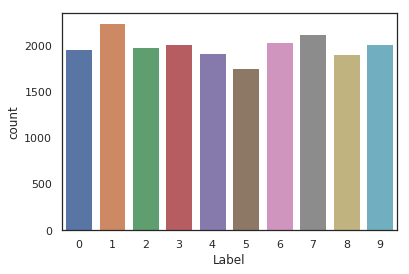

In [0]:
sns.countplot(Y_train_o)

In [0]:
# Check data
X_train_o.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
# Reshape
X_train = X_train_o.values.reshape(-1, 28, 28, 1)
# Normalize
X_train = (X_train / 255.0)
# One-hot
Y_train = to_categorical(Y_train_o, num_classes=10)

In [0]:
# Split data into train, valid
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

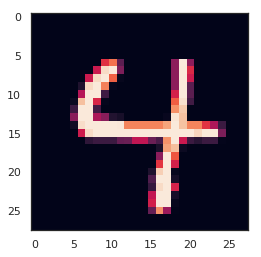

In [0]:
plt.imshow(X_train[3][:,:,0])

## CNN model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [0]:
optimizer = RMSprop(lr=0.001)

In [0]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

## Train

In [0]:
epochs = 5 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [0]:
# Without data augmentation
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 17999 samples, validate on 2000 samples
Epoch 1/5
 - 126s - loss: 0.4040 - acc: 0.8742 - val_loss: 0.1297 - val_acc: 0.9615
Epoch 2/5
 - 125s - loss: 0.1144 - acc: 0.9657 - val_loss: 0.0737 - val_acc: 0.9745
Epoch 3/5
 - 126s - loss: 0.0829 - acc: 0.9753 - val_loss: 0.0633 - val_acc: 0.9845
Epoch 4/5
 - 126s - loss: 0.0665 - acc: 0.9794 - val_loss: 0.0499 - val_acc: 0.9845
Epoch 5/5
 - 126s - loss: 0.0555 - acc: 0.9841 - val_loss: 0.0489 - val_acc: 0.9845


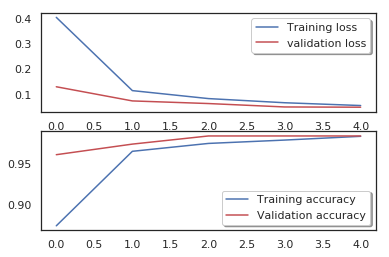

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
# Confusing matrix
Y_pred = model.predict(X_val)

In [0]:
Y_pred_class = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

In [0]:
conm = confusion_matrix(Y_true, Y_pred_class)

Text(0.5, 12.5, 'Predicted label')

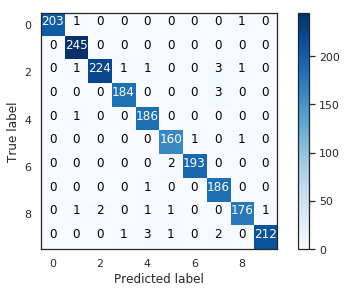

In [0]:
plt.imshow(conm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
for i, j in itertools.product(range(conm.shape[0]), range(conm.shape[1])):
        plt.text(j, i, conm[i, j],
                 horizontalalignment="center",
                 color="white" if conm[i, j] > 50 else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Predict Result

In [0]:
Y_test = test['7']
Y_test = to_categorical(Y_test)
X_test_o = test.drop('7', axis=1)

In [0]:
X_test_o.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
X_test = X_test_o.values.reshape(-1, 28, 28, 1)

In [0]:
model.evaluate(X_test, Y_test)

9999/9999 [==============================] - 21s 2ms/step


[0.20665364740188694, 0.9870987098709871]

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________